<a href="https://colab.research.google.com/github/Preeti-Yadav-CS1/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Text Classification using spacy tool

In [ ]:
! pip install scikit-learn

# Bag of words and Tf-Idf
## Tf-Tdf= TF(t,d)* Idf(t)
- TF(t) or Term Frequency =number of frequency of a term in a document/total no of terms in that document.
- Idf(t) or inverse Document Frequency =log (number of document/number of document consist term t)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('spam.tsv', sep='\t')

In [ ]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
len(df)

5572

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

# Balance this data

In [ ]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [ ]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [ ]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [ ]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [ ]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [ ]:
data=ham.append(spam,ignore_index=True)
data

,label,message,length,punct
0,ham,How come u got nothing to do?,29,1
1,ham,"Sir, I am waiting for your mail.",32,2
2,ham,Dear how is chechi. Did you talk to her,39,1
3,ham,Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur S...,121,6
4,ham,Ok.ok ok..then..whats ur todays plan,36,5
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


### Exploratory Data Analysis

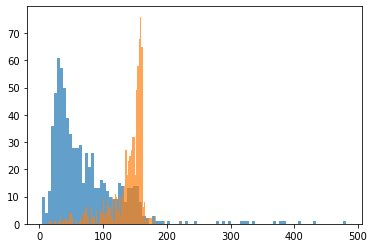

In [ ]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()


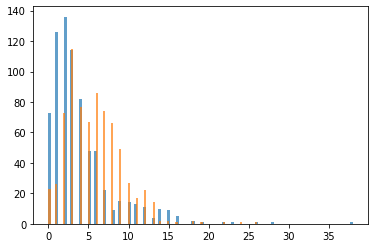

In [ ]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

#### Data preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
x_train, x_test, y_train,y_test=train_test_split(data['message'],data['label'], test_size=0.3,shuffle=True,stratify=data['label'])

In [ ]:
x_train.shape

(1045,)

In [ ]:
y_train

1314    spam
122      ham
115      ham
785     spam
997     spam
        ... 
776     spam
1281    spam
192      ham
375      ham
945     spam
Name: label, Length: 1045, dtype: object

### Bag of Words Creation

In [ ]:
vectorizer=TfidfVectorizer()

In [ ]:
X_train=vectorizer.fit_transform(x_train)

In [ ]:
X_train.shape

(1045, 3786)

In [ ]:
1045*3817

3988765

In [ ]:
X_train

<1045x3786 sparse matrix of type '<class 'numpy.float64'>'
	with 17832 stored elements in Compressed Sparse Row format>

### Pipeline and RF 

In [ ]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [ ]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[220,   4],
       [ 20, 205]], dtype=int64)

In [ ]:
accuracy_score(y_test,y_pred)

0.9465478841870824

In [ ]:
clf.predict(["Hy, Whatsup"])

array(['ham'], dtype=object)

In [ ]:
clf.predict(["Reminder"])

array(['ham'], dtype=object)

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1, gamma='auto'))])

In [ ]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[  0, 225],
       [  0, 224]], dtype=int64)

In [ ]:
accuracy_score(y_test,y_pred)

0.49888641425389757